In [13]:
from bdm_analysis.lib import who_am_i
who_am_i()

Hello my name is Yas


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.oauth2 import service_account
from google.cloud import bigquery
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Debug prints
print("Current working directory:", os.getcwd())
key_path = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
print("Key path:", key_path)
print("File exists:", os.path.exists(key_path))
print("File contents readable:", os.access(key_path, os.R_OK))

Current working directory: /home/clemt/projet_BDM/group4_BD_mgt/bdm_analysis/notebooks
Key path: /home/clemt/projet_BDM/group4_BD_mgt/august-voyage-390012-9a63e6007306.json
File exists: True
File contents readable: True


In [3]:
try:
    # Create credentials
    credentials = service_account.Credentials.from_service_account_file(key_path)
    print("Credentials created successfully")
    print("Project ID:", credentials.project_id)
    
    # Initialize client
    client = bigquery.Client(credentials=credentials, project=credentials.project_id)
    print("Client initialized successfully")
    
    # Test query
    query = """
    SELECT *
    FROM `edhec-business-manageme.luxurydata2502.price-monitoring-2022`
    WHERE brand = 'Panerai'
    """
    df = client.query(query).to_dataframe()
    print("Query executed successfully")
    
except Exception as e:
    print("Error occurred:")
    print(str(e))

Credentials created successfully
Project ID: august-voyage-390012
Client initialized successfully


/home/clemt/.pyenv/versions/totoenv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Query executed successfully


In [4]:
print("First 5 rows:")
df.head(n=5)

First 5 rows:


,uid,brand,url,price,currency,image_url,collection,reference_code,country,life_span_date,life_span,price_before,price_difference,price_percent_change,price_changed,is_new
0,797622,Panerai,https://www.panerai.com/ch/fr/collections/watc...,20200,CHF,https://www.panerai.com/content/dam/rcq/pan/22...,SUBMERSIBLE,PNPAM01291,None,2021-11-30,Q4 November 2021,NaN,0,0.0,0.0,NaN
1,797623,Panerai,https://www.panerai.com/ch/fr/collections/watc...,45200,CHF,https://www.panerai.com/content/dam/rcq/pan/22...,SUBMERSIBLE,PNPAM01240,None,2021-11-30,Q4 November 2021,NaN,0,0.0,0.0,NaN
2,797624,Panerai,https://www.panerai.com/ch/fr/collections/watc...,8800,CHF,https://www.panerai.com/content/dam/rcq/pan/21...,SUBMERSIBLE,PNPAM01223,None,2021-11-30,Q4 November 2021,NaN,0,0.0,0.0,NaN
3,797625,Panerai,https://www.panerai.com/ch/fr/collections/watc...,29800,CHF,https://www.panerai.com/content/dam/rcq/pan/21...,SUBMERSIBLE,PNPAM01163,None,2021-11-30,Q4 November 2021,NaN,0,0.0,0.0,NaN
4,797626,Panerai,https://www.panerai.com/ch/fr/collections/watc...,10600,CHF,https://www.panerai.com/content/dam/rcq/pan/21...,SUBMERSIBLE,PNPAM01068,None,2021-11-30,Q4 November 2021,NaN,0,0.0,0.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18304 entries, 0 to 18303
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   18304 non-null  Int64         
 1   brand                 18304 non-null  object        
 2   url                   18304 non-null  object        
 3   price                 17040 non-null  Int64         
 4   currency              18304 non-null  object        
 5   image_url             14786 non-null  object        
 6   collection            18297 non-null  object        
 7   reference_code        18301 non-null  object        
 8   country               0 non-null      object        
 9   life_span_date        18304 non-null  datetime64[us]
 10  life_span             18304 non-null  object        
 11  price_before          9105 non-null   float64       
 12  price_difference      18304 non-null  Int64         
 13  price_percent_ch

In [6]:
for col in df.columns: #Basic counting of all columns in the dataset for exploration
  print("\n",col,"Is a", df[col].dtype," type with ",df[col].nunique(),"nunique values over ",df[col].count()," observations."," This columns counts",df[col].isnull().sum(),"null values.")


 uid Is a Int64  type with  18304 nunique values over  18304  observations.  This columns counts 0 null values.

 brand Is a object  type with  1 nunique values over  18304  observations.  This columns counts 0 null values.

 url Is a object  type with  2331 nunique values over  18304  observations.  This columns counts 0 null values.

 price Is a Int64  type with  1115 nunique values over  17040  observations.  This columns counts 1264 null values.

 currency Is a object  type with  11 nunique values over  18304  observations.  This columns counts 0 null values.

 image_url Is a object  type with  255 nunique values over  14786  observations.  This columns counts 3518 null values.

 collection Is a object  type with  5 nunique values over  18297  observations.  This columns counts 7 null values.

 reference_code Is a object  type with  268 nunique values over  18301  observations.  This columns counts 3 null values.

 country Is a object  type with  0 nunique values over  0  observat

In [7]:
## General information about the dataset
print(f"Dataframe info:")
print(f"Dataframe shape: {df.shape}")
print(f"df")

## Basic analysis of price column
print(f"Price column info:")
print(f"Price column mean: {round(df['price'].mean())}")
print(f"Price column median: {df['price'].median()}")

Dataframe info:
Dataframe shape: (18304, 16)
df
Price column info:
Price column mean: 1413467
Price column median: 48550.0


In [8]:
## Deleting all observations with price = 0 :
df = df[df['price'] != 0]
df['price'].describe()

count           17040.0
mean     1413466.691901
std      4627998.542048
min              3800.0
25%             11050.0
50%             48550.0
75%            313000.0
max          50000000.0
Name: price, dtype: Float64

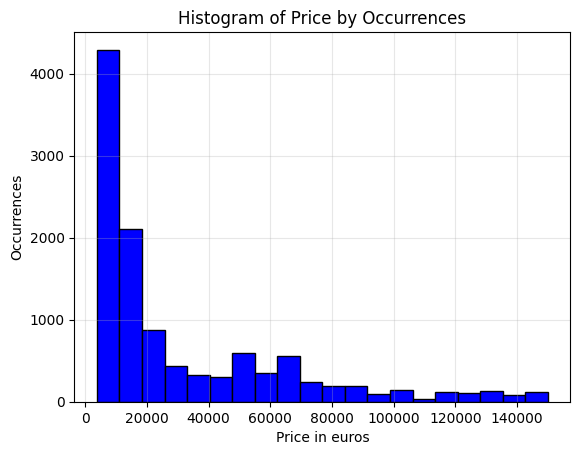

In [9]:
## Exclude observations with price greater than 150,000
df_filtered = df[df['price'] <= 150000]

## Draw price frequency on matplotlib :
plt.grid(True, alpha =0.3)
plt.hist(df_filtered['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Price in euros')
plt.ylabel('Occurrences')
plt.title('Histogram of Price by Occurrences')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [10]:
## Grouping prices by currency :
df['currency'].value_counts()
df.groupby('currency')['price'].mean()

currency
AED      59492.476489
CHF         17149.625
CNY     109483.114447
EUR       17444.22957
GBP      15368.181818
HKD     141366.567164
JPY    1954655.370722
KRW    15455766.74938
SGD      22560.376794
TWD     347782.772681
USD      18426.644295
Name: price, dtype: Float64

In [11]:
## Working on date now for currency arbitrage : 
print(f"{df["life_span_date"].min()} to {df["life_span_date"].max()}")

2021-11-30 00:00:00 to 2022-12-28 00:00:00


In [ ]:
## Creating a new function for generating the conversion rate given a specific time and currency

import requests
## To export at root level

def get_conversion_rate(date, base_currency = "USD", target_currency = "EUR"):
    """
    Conversion rate of two currencies at date.
    
    Args:
        date (str): YYYY-MM-DD.
        base_currency (str): "USD"
        target_currency (str): "EUR"
        
    Returns:
        float: Le taux de conversion si la requête est réussie, sinon None.
    """
    url = f"https://api.exchangerate.host/{date}"
    params = {
        "base": base_currency,
        "symbols": target_currency
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        rate = data.get("rates", {}).get(target_currency)
        return rate
    else:
        print("Erreur lors de la récupération du taux de conversion.")
        return None

if __name__ == "__main__":
    # Exemple d'utilisation
    date = "2020-04-04"        # Date souhaitée
    base_currency = "USD"       # Devise de base
    target_currency = "EUR"     # Devise cible
    
    rate = get_conversion_rate(date, base_currency, target_currency)
    
    if rate:
        print(f"Taux de conversion le {date} : 1 {base_currency} = {rate} {target_currency}")
    else:
        print("Aucun taux de conversion trouvé.")


Erreur : Pas de taux de conversion pour EUR le 2020-04-04
Aucun taux de conversion trouvé.
